In [1]:
import tensorflow as tf
sess = tf.Session()
x = tf.constant(1.0)
b = tf.constant(2.0)
y = x + b
sess.run(tf.gradients(y,x))

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
a = tf.constant(5, name='input_a')
b = tf.constant(3, name='input_b')

In [4]:
c = tf.multiply(a, b, name ="mul_c")
d = tf.add(a, b, name="add_d")
e = tf.add(c, d, name="add_e")
shape = tf.shape(a, name = "a_shape")
print(shape)

print(sess.run(shape))
print(sess.run(e))
print(sess.run(c))
writer = tf.summary.FileWriter("/tmp/my_graph", sess.graph)
writer = tf.summary.FileWriter("/tmp/my_graph2", sess.graph)

Tensor("a_shape:0", shape=(0,), dtype=int32)
[]
23
15


In [9]:
sess = tf.Session()
graph = tf.get_default_graph()
graph.as_default()

with graph.as_default():
    in_1 = tf.placeholder(tf.float32, shape=[], name = "input_a")
    in_2 = tf.placeholder(tf.float32, shape=[], name = "input_b")
    const = tf.constant(3, dtype=tf.float32, name="static_value")
    
    with tf.name_scope("transformation"):
        with tf.name_scope("A"):
            A_mul = tf.multiply(in_1, const)
            A_out = tf.subtract(A_mul, in_1)
        with tf.name_scope("B"):
            B_mul = tf.multiply(in_2, const)
            B_out = tf.subtract(B_mul, in_2)
        with tf.name_scope("C"):
            C_div = tf.divide(A_out, B_out)
            C_out = tf.add(C_div, const)
        with tf.name_scope("D"):
            D_div = tf.divide(B_out, A_out)
            D_out = tf.add(D_div, const)
        out = tf.maximum(C_out, D_out)

init = tf.global_variables_initializer()
sess.run(init)
print(sess.run(out, feed_dict={in_1:10.0, in_2:100.0}))
writer = tf.summary.FileWriter("/tmp/name_scope_2", graph=graph)
writer.close
sess.close()

13.0


In [32]:
def gugu(dan):
    level = tf.constant(dan)
    state = tf.Variable(0)
    add = tf.add(state, 1)
    value = tf.assign(state, add)
    update = tf.multiply(level, value)
    
    with tf.Session() as sess:
        tf.global_variables_initializer().run()
        for _ in range(9):
            result = sess.run(update)
            left, right = level.eval(), state.eval()
            print("{} x {} = {:2}".format(left, right, result))
            
for _ in range(1,2):
    gugu(_)

1 x 1 =  1
1 x 2 =  2
1 x 3 =  3
1 x 4 =  4
1 x 5 =  5
1 x 6 =  6
1 x 7 =  7
1 x 8 =  8
1 x 9 =  9


Tensor("Shape:0", shape=(3,), dtype=int32)


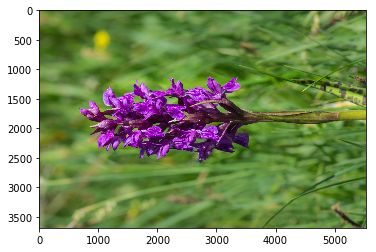

In [26]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

dir_path = os.path.dirname(os.path.realpath("__file__"))
filename = dir_path + "/MarshOrchid.jpg"
image = mpimg.imread(filename)

x = tf.Variable(image, name = 'x')
model = tf.global_variables_initializer()
# 3차원 배열인 이유는 마지막값이 color를 가지고 있기 때문

with tf.Session() as sess:
    x = tf.transpose(x, perm=[1, 0, 2])
    sess.run(model)
    result = sess.run(x)
    
plt.imshow(result)
plt.show()

In [ ]:
# 0에서 10까지의 합을 구해보시오 
import tensorflow as tf
x = tf.Variable(0, name='x')
hap = tf.Variable(0, name ='hap')

model = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(model)
    for i in range(10):
        x = x + 1
        hap = hap+x
        print(session.run(x))
    print("1부터 100까지의 합 = ", session.run(hap))

In [70]:
import numpy as np

x = tf.placeholder("float")
y = tf.placeholder("float")

w = tf.Variable([1.0, 2.0], name = 'w')

y_model = tf.multiply(x, w[0]) + w[1]

error = tf.square(y - y_model)
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(error)

model = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(model)
    for i in range(10000):
        x_value = np.random.rand()
        y_value = x_value * 2 + 6
        sess.run(train_op, feed_dict={x:x_value, y:y_value})
    w_value = sess.run(w)
    print("예측 모델: {a:.3f}x + {b:.3f}".format(a=w_value[0], b = w_value[1]))

예측 모델: 2.000x + 6.000


In [84]:
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()
tf.set_random_seed(5)
np.random.seed(42)

# batch size를 정하는 이유는 gradient시 극소값에 빠지지 않게 하기 위함
batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1, 1]))
b1 = tf.Variable(tf.random_uniform(shape=[1, 1]))
a2 = tf.Variable(tf.random_normal(shape=[1, 1]))
b2 = tf.Variable(tf.random_uniform(shape=[1, 1]))
x = np.random.normal(2, 0.1, 500)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))

init = tf.global_variables_initializer()
sess.run(init)

my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)

loss_vec_sigmoid = []
loss_vec_relu = []

for i in range(500):
    rand_indices = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_indices]])
    sess.run(train_step_sigmoid, feed_dict={x_data:x_vals})
    sess.run(train_step_relu, feed_dict={x_data:x_vals})
    
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data:x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data:x_vals}))
    
    sigmoid_output = np.mean(sess.run(sigmoid_activation, feed_dict={x_data:x_vals}))
    relu_output = np.mean(sess.run(relu_activation, feed_dict={x_data:x_vals}))
    
    if i%50 == 0:
        print("sigmoid = " + str(np.mean(sigmoid_output)) + "\trelu = " + str(np.mean(relu_output)))

sigmoid = 0.12655208	relu = 2.0227606
sigmoid = 0.17863758	relu = 0.7530296
sigmoid = 0.24769811	relu = 0.7492897
sigmoid = 0.3446748	relu = 0.7499546
sigmoid = 0.4400661	relu = 0.7539999
sigmoid = 0.5236898	relu = 0.754772
sigmoid = 0.58373857	relu = 0.7508698
sigmoid = 0.62733483	relu = 0.7470234
sigmoid = 0.6549499	relu = 0.75180537
sigmoid = 0.67452586	relu = 0.75470716


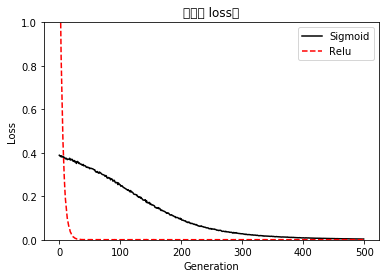

In [85]:
plt.plot(loss_vec_sigmoid, 'k-', label = "Sigmoid")
plt.plot(loss_vec_relu, 'r--', label="Relu")
plt.ylim([0, 1.0])
plt.title("세대별 loss값")
plt.xlabel("Generation")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


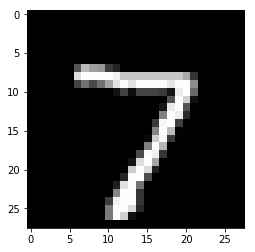

In [87]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot= True)
with tf.Session() as sess:
    first_image = mnist.test.images[0]
    first_image = np.array(first_image, dtype = 'float')
    pixels = first_image.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [99]:
x = tf.placeholder(tf.float32, [None, 784])
# 10인 이유 one hot encoding 때문
y_ = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:batch_xs, y_:batch_ys})
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels}))

C:\Users\acorn\Anaconda3\envs\zipline_test\lib\site-packages\tensorflow\python\client\session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


0.9185


# 문제
- 마지막 줄의 print(sess.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels}))의 실행 순서는?
<pre>
test 시에는 가중치(W)가 최적화되지 않는다. train시에만 된다.
</pre>

In [116]:
learning_rate = 0.001 
training_epochs = 15
batch_size = 100
display_step = 1

n_hidden_1 = 256
n_hidden_2 = 256
n_input = 784
n_classes = 10

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

def multilayer_perceptron(x, weights, biases):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

weights = {
    'h1':tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

pred = multilayer_perceptron(x, weights, biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
# adam optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    # 동일한 데이터를 15번 학습한다.
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y:batch_y})
            avg_cost += c / total_batch
        if epoch %display_step == 0:
            print("epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
    print("train 완료")
            
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("정확도:", accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))

epoch: 0001 cost= 170.593012127
epoch: 0002 cost= 37.382830758
epoch: 0003 cost= 22.596266042
epoch: 0004 cost= 15.461660609
epoch: 0005 cost= 11.133818417
epoch: 0006 cost= 8.275763579
epoch: 0007 cost= 6.215065714
epoch: 0008 cost= 4.576076829
epoch: 0009 cost= 3.385182004
epoch: 0010 cost= 2.521755673
epoch: 0011 cost= 1.994056527
epoch: 0012 cost= 1.507390711
epoch: 0013 cost= 1.190177086
epoch: 0014 cost= 0.838954303
epoch: 0015 cost= 0.750436004
train 완료
정확도: 0.9448


In [10]:
sess = tf.Session()

val = [0, 2, 3]
val = tf.tile(val, [5])
print(sess.run(val), end = '\n\n')

val = [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
val = tf.tile(val, [5, 1])
print(sess.run(val), end = '\n\n')

input_vecs = [[1., 2.], [2., 1.], [-2., -1.]]
tiled_vecs = tf.tile(input_vecs, [1, 3])
print(sess.run(tiled_vecs), end = '\n\n')

tiled_vecs = tf.tile(input_vecs, [2, 3])
print(sess.run(tiled_vecs))

[0 2 3 0 2 3 0 2 3 0 2 3 0 2 3]

[[1 1 1]
 [2 2 2]
 [3 3 3]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [1 1 1]
 [2 2 2]
 [3 3 3]]

[[ 1.  2.  1.  2.  1.  2.]
 [ 2.  1.  2.  1.  2.  1.]
 [-2. -1. -2. -1. -2. -1.]]

[[ 1.  2.  1.  2.  1.  2.]
 [ 2.  1.  2.  1.  2.  1.]
 [-2. -1. -2. -1. -2. -1.]
 [ 1.  2.  1.  2.  1.  2.]
 [ 2.  1.  2.  1.  2.  1.]
 [-2. -1. -2. -1. -2. -1.]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from scipy.spatial import cKDTree
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from tensorflow.python.framework import ops

ops.reset_default_graph()

sess = tf.Session()
iris = datasets.load_iris()

num_pts = len(iris.data)
num_feats = len(iris.data[0])

k = 3
generations = 25

data_points = tf.Variable(iris.data)
cluster_labels = tf.Variable(tf.zeros([num_pts], dtype=tf.int64))
rand_starts = np.array([iris.data[np.random.choice(len(iris.data))] for _ in range(k)])
centroids = tf.Variable(rand_starts)
centroid_matrix = tf.reshape(tf.tile(centroids, [num_pts, 1]), [num_pts, k, num_feats])
point_matrix = tf.reshape(tf.tile(data_points, [1, k]), [num_pts, k, num_feats])
distances = tf.reduce_sum(tf.square(point_matrix - centroid_matrix), axis=2)

centroid_group = tf.argmin(distances, 1)

def data_group_avg(group_ids, data):
    sum_total = tf.unsorted_segment_sum(data, group_ids, 3)
    num_total = tf.unsorted_segment_sum(tf.ones_like(data), group_ids, 3)
    avg_by_group = sum_total/num_total
    return avg_by_group
means = data_group_avg(centroid_group, data_points)
update = tf.group(centroids.assign(means), cluster_labels.assign(centroid_group))
init = tf.global_variables_initializer()
sess.run(init)

for i in range(generations):
    print("Calculating gen {}, out of {}.".format(i, generations))
    _, centroid_group_count = sess.run([update, centroid_group])
    group_count = []
    
    for ix in range(k):
        group_count.append(np.sum(centroid_group_count==ix))
    print("Group counts: {}".format(group_count))
[centers, assignments] = sess.run([centroids, cluster_labels])

In [ ]:
import sys
sys.path.append("C:\\Users\\acorn\\Anaconda3\\Lib\\site-packages")
sys.path

In [2]:
import datasets
datasets.__path__

ImportError: No module named 'datasets'